In [ ]:
import requests
substring = "You Know, for Search".encode()
response = requests.get("http://127.0.0.1:9200")
if substring in response.content:
   print("Elasticsearch is up and running!")
else:
   print("Something went wrong, ensure the cluster is up!")

In [ ]:
from elasticsearch import Elasticsearch

es_client = Elasticsearch(
    hosts=[{"host": "localhost", "port": 9200}],
    http_auth=["elastic", "changeme"],
)

es_client.indices.get_alias("*")

---

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import collections
import os

cwd = os.getcwd()

assignments_list = []
topics_df = pd.DataFrame()

i = 0
while os.path.exists(cwd + '/results/prototypes/prototypes{}.txt'.format(i)):
    
    if i != 0:
        #print(f'\nIteration {i} cluster sizes...')
        with open(cwd + '/results/assignments/assignments{}.txt'.format(i), 'r') as f:
            for line in f:
                clusterId, docs = line.split(':')
                assigned_docs = docs.split(' ')

                doc_topics = [doc.split('.')[0] for doc in assigned_docs]
                topic_counts = dict(collections.Counter(doc_topics))
                topic_counts_df = pd.Series(topic_counts).to_frame().T
                topics_df = pd.concat([topics_df, topic_counts_df], ignore_index=True)

                #print(f'clusterId: {clusterId} n_assigned: {len(assigned_docs)}')
                assignments_list.append([clusterId, i, len(assigned_docs)])
    
    # update counter
    i += 1

# create dataframe from assignments_list
df1 = pd.DataFrame(assignments_list, columns =['clusterId', 'iteration', 'assigned_docs'])

#
assignments_df = pd.concat([df1, topics_df], axis=1)


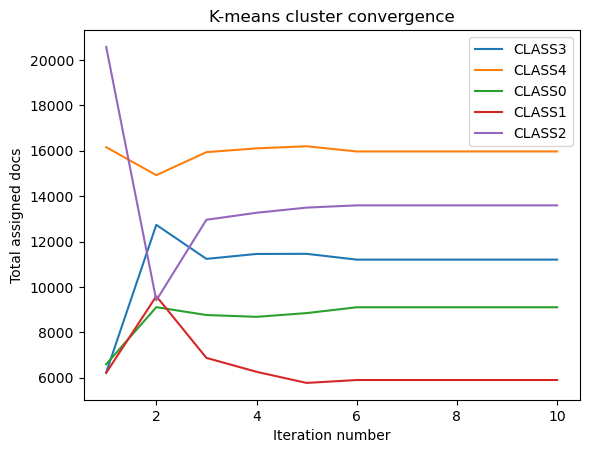

In [109]:
for cluster in assignments_df.clusterId.unique():
    plt.plot(assignments_df.iteration[assignments_df['clusterId']==cluster], 
            assignments_df.assigned_docs[assignments_df['clusterId']==cluster], 
            label=cluster)
plt.title('K-means cluster convergence')
plt.xlabel('Iteration number')
plt.ylabel('Total assigned docs')
plt.legend(loc='upper right')
plt.show()

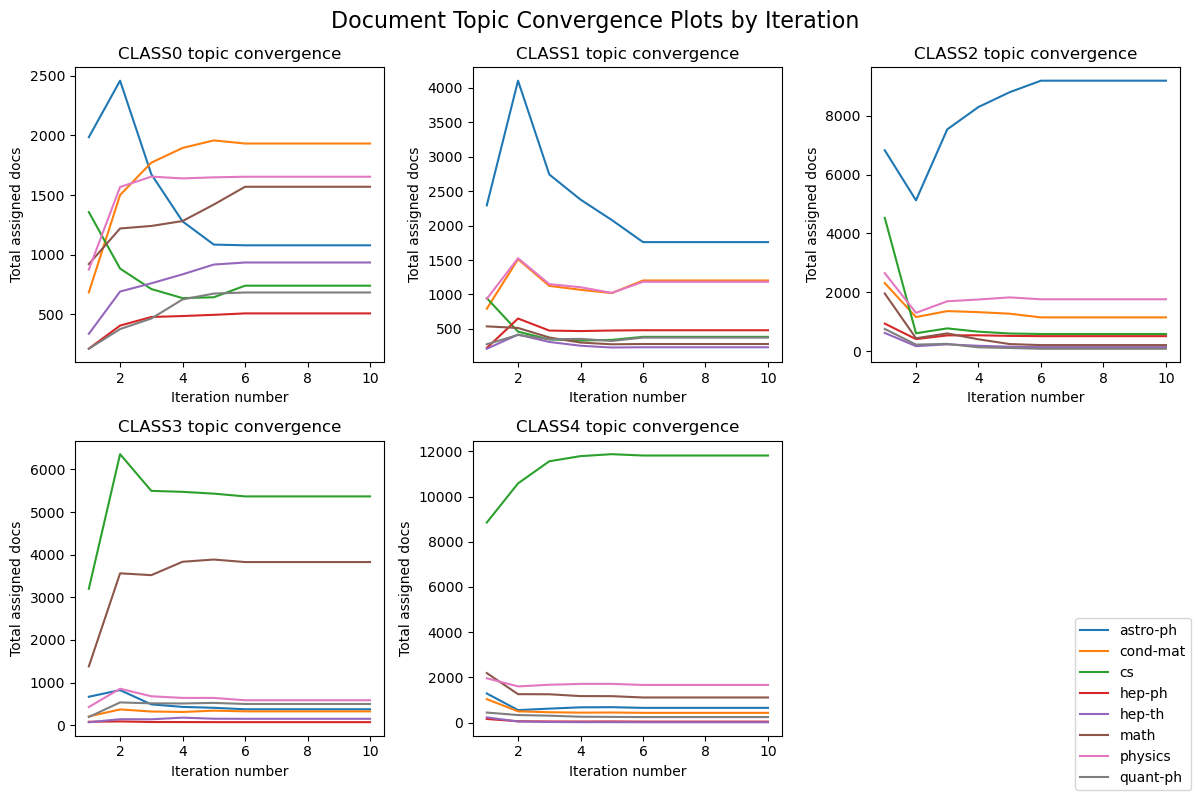

In [110]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 3, figsize=(12,8))

cluster = 'CLASS0'
for topic in assignments_df.columns[3:]:
    axis[0, 0].plot(assignments_df.iteration[assignments_df['clusterId']==cluster], 
            assignments_df[topic][assignments_df['clusterId']==cluster], 
            label=topic)
axis[0, 0].set_title(f'{cluster} topic convergence')
axis[0, 0].set_xlabel('Iteration number')
axis[0, 0].set_ylabel('Total assigned docs')

cluster = 'CLASS1'
for topic in assignments_df.columns[3:]:
    axis[0, 1].plot(assignments_df.iteration[assignments_df['clusterId']==cluster], 
            assignments_df[topic][assignments_df['clusterId']==cluster], 
            label=topic)
axis[0, 1].set_title(f'{cluster} topic convergence')
axis[0, 1].set_xlabel('Iteration number')
axis[0, 1].set_ylabel('Total assigned docs')

cluster = 'CLASS2'
for topic in assignments_df.columns[3:]:
    axis[0, 2].plot(assignments_df.iteration[assignments_df['clusterId']==cluster], 
            assignments_df[topic][assignments_df['clusterId']==cluster], 
            label=topic)
axis[0, 2].set_title(f'{cluster} topic convergence')
axis[0, 2].set_xlabel('Iteration number')
axis[0, 2].set_ylabel('Total assigned docs')

cluster = 'CLASS3'
for topic in assignments_df.columns[3:]:
    axis[1, 0].plot(assignments_df.iteration[assignments_df['clusterId']==cluster], 
            assignments_df[topic][assignments_df['clusterId']==cluster], 
            label=topic)
axis[1, 0].set_title(f'{cluster} topic convergence')
axis[1, 0].set_xlabel('Iteration number')
axis[1, 0].set_ylabel('Total assigned docs')

cluster = 'CLASS4'
for topic in assignments_df.columns[3:]:
    axis[1, 1].plot(assignments_df.iteration[assignments_df['clusterId']==cluster], 
            assignments_df[topic][assignments_df['clusterId']==cluster], 
            label=topic)
axis[1, 1].set_title(f'{cluster} topic convergence')
axis[1, 1].set_xlabel('Iteration number')
axis[1, 1].set_ylabel('Total assigned docs')

# Combine all the operations and display
lines_labels = [axis.get_legend_handles_labels() for axis in figure.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
figure.legend(lines[:8], labels[:8], loc='lower right')
figure.delaxes(axis[1,2])
figure.suptitle('Document Topic Convergence Plots by Iteration', fontsize=16)
figure.tight_layout()

plt.show()

---